# Introduction

This notebook assumes you have activated credentials with the CAVE client. CAVE (Connectome Annotation Versioning Engine) is built and supported by a collaboration between the Seung lab at Princeton and the Allen Institute for Brain Science. It allows for programmatic access to the tables associated with Minnie and other datasets. [Github](https://github.com/seung-lab/CAVEclient) 

CAVE setup instructions are [here](https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/mm3_intro/CAVEsetup.ipynb).

CAVE tutorial for querying the data is [here](https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/mm3_intro/SynapseAndAnnotationQuery.ipynb).

## Using CAVEclient to query data

In [1]:
from caveclient import CAVEclient

Load the public client for accessing the datastack in CAVE. If you have not acquired an authentication token, run the code below to get a new token. You will need to link your Google account.

In [2]:
client = CAVEclient()
client.auth.save_token(token="3fedb5aedd33f7ddc710953e0fe1c7cc", overwrite=True)
#client.auth.get_new_token()

If you have successfully added your token or already have a valid token saved from a previous session, you should be able to initialize the client with the `minnie65_public` datastack:

```python
client = CAVEclient('minnie65_public')
```

If your previous saved token is invalidated, you will need to save your newly acquired token with the argument `overwrite=True`.

```python
client.auth.save_token(token="3fedb5aedd33f7ddc710953e0fe1c7cc", overwrite=True)
```

In [3]:
# this is the datastack name of the public release
# passing it will auto-configure many of the services
client = CAVEclient('minnie65_public')

### Setting the version of the public release

With the initialized client, set the version of the public release:

```python
client.materialize.version = VERSION
```

Table names and data will change between versions. This notebook is built around version `661`. To use a later version, find the corresponding tables in the new version. 

In [ ]:
client.materialize.version = 661

### View available annotation tables

In [6]:
client.materialize.get_tables()

['synapses_pni_2',
 'baylor_gnn_cell_type_fine_model_v2',
 'nucleus_alternative_points',
 'connectivity_groups_v507',
 'proofreading_status_public_release',
 'allen_column_mtypes_v1',
 'allen_v1_column_types_slanted_ref',
 'aibs_column_nonneuronal_ref',
 'nucleus_ref_neuron_svm',
 'aibs_soma_nuc_exc_mtype_preds_v117',
 'baylor_log_reg_cell_type_coarse_v1',
 'apl_functional_coreg_forward_v5',
 'nucleus_detection_v0',
 'aibs_soma_nuc_metamodel_preds_v117',
 'coregistration_manual_v3']

### Query functionally matched EM neurons

In [7]:
import pandas as pd

In [8]:
matched_df = client.materialize.query_table('coregistration_manual_v3')
matched_df

id                          created valid  target_id  session  \
0      13434 2023-04-05 22:39:53.474202+00:00     t     582276        7   
1       3045 2023-04-05 22:39:03.110911+00:00     t     194144        7   
2       1474 2023-04-05 22:36:19.477499+00:00     t     293318        9   
3       7915 2023-04-05 22:39:15.451639+00:00     t     332833        6   
4      11589 2023-04-05 22:39:47.420305+00:00     t     295460        9   
...      ...                              ...   ...        ...      ...   
13920   2323 2023-04-05 22:39:00.197594+00:00     t     293075        9   
13921  10023 2023-04-05 22:39:40.658776+00:00     t     293075        9   
13922   2840 2023-04-05 22:39:00.636805+00:00     t     395416        9   
13923   4554 2023-04-05 22:39:07.141941+00:00     t     395416        9   
13924  11479 2023-04-05 22:39:47.331131+00:00     t     485825        5   

       scan_idx  unit_id  field  residual     score  id_ref  \
0             5     4909      4   6.10722  9.568690  582276   
1             4     9575      6   8.55708 -0.714900  194144   
2             4     8066      6   5.63758  8.915025  293318   
3             7     6413      6   5.27806  7.808064  332833   
4             3     7748      6   5.20837  2.999543  295460   
...         ...      ...    ...       ...       ...     ...   
13920         4     4693      4   3.21152  6.692787  293075   
13921         4     7533      6  10.42720 -0.232141  293075   
13922         3     2456      2   4.95407  3.168314  395416   
13923         3     4759      4   6.51528  4.102491  395416   
13924         6     1538      2   5.26231  9.976701  485825   

                           created_ref valid_ref      volume  \
0     2020-09-28 22:41:42.536121+00:00         t  274.291589   
1     2020-09-28 22:42:01.511773+00:00         t  213.307228   
2     2020-09-28 22:45:23.572432+00:00         t  430.108180   
3     2020-09-28 22:44:41.864456+00:00         t  274.418729   
4     2020-09-28 22:41:24.368712+00:00         t  208.616653   
...                                ...       ...         ...   
13920 2020-09-28 22:41:16.438872+00:00         t  287.333417   
13921 2020-09-28 22:41:16.438872+00:00         t  287.333417   
13922 2020-09-28 22:44:46.280352+00:00         t  282.205061   
13923 2020-09-28 22:44:46.280352+00:00         t  282.205061   
13924 2020-09-28 22:41:48.027148+00:00         t  371.868795   

         pt_supervoxel_id          pt_root_id              pt_position  \
0      111332012547320963  864691135738685297  [338720, 125232, 19589]   
1       83542405709639148  864691135614842827  [136400, 170640, 17951]   
2       90783515419343652  864691135502985397  [189472, 119296, 26037]   
3       93535317407139914  864691135387371905  [209328, 174304, 20004]   
4       90225718084406516  864691135661410544  [185088, 157776, 15691]   
...                   ...                 ...                      ...   
13920   91487065153289270  864691136144304948  [194528, 118128, 23566]   
13921   91487065153289270  864691136144304948  [194528, 118128, 23566]   
13922   97825062761246370  864691135394864117  [240528, 154032, 25770]   
13923   97825062761246370  864691135394864117  [240528, 154032, 25770]   
13924  105277895836000216  864691136966674894  [294512, 107648, 23083]   

      bb_start_position  bb_end_position  
0       [nan, nan, nan]  [nan, nan, nan]  
1       [nan, nan, nan]  [nan, nan, nan]  
2       [nan, nan, nan]  [nan, nan, nan]  
3       [nan, nan, nan]  [nan, nan, nan]  
4       [nan, nan, nan]  [nan, nan, nan]  
...                 ...              ...  
13920   [nan, nan, nan]  [nan, nan, nan]  
13921   [nan, nan, nan]  [nan, nan, nan]  
13922   [nan, nan, nan]  [nan, nan, nan]  
13923   [nan, nan, nan]  [nan, nan, nan]  
13924   [nan, nan, nan]  [nan, nan, nan]  

[13925 rows x 19 columns]

### Column descriptions:

<b>id:</b> a unique identifier for this row

<b>valid:</b> internal check, uniformly ‘t’

<b>pt_supervoxel_id:</b> the ID of the supervoxel from the watershed segmentation that is under the pt_position

<b>pt_root_id:</b> the ID of the segment/root_id under the pt_position from the Proofread Segmentation (v343).

<b>session:</b> the ID indicating the imaging period for the mouse

<b>scan_idx:</b> the index of the scan within the imaging session

<b>unit_id:</b> the ID of the functional ROI (unique per scan)

<b>pt_position_{x,y,z}:</b> the location in 4,4,40 nm voxels at a cell body for the cell

<b>residual:</b> the Euclidean distance between the EM nucleus centroid and the matched functional centroid after the AIBS EM -> 2P coregistration transform

<b>separation:</b> For a matched EM nucleus to a functional unit the separation score is computed as the difference between the residual of the matched pair and the residual of the nearest EM neuronal nucleus that was not matched to the unit.

Note: More confident matches will have a smaller residual and larger separation

### Select a random entry

In [9]:
entry = matched_df.sample(1)
entry

id                          created valid  target_id  session  \
13072  5955 2023-04-05 22:39:10.165888+00:00     t     653528        5   

       scan_idx  unit_id  field  residual     score  id_ref  \
13072         3     4303      4   6.25951  5.985315  653528   

                           created_ref valid_ref      volume  \
13072 2020-09-28 22:41:06.348841+00:00         t  252.391916   

         pt_supervoxel_id          pt_root_id              pt_position  \
13072  116330049212371158  864691135848594270  [375088, 139024, 22593]   

      bb_start_position  bb_end_position  
13072   [nan, nan, nan]  [nan, nan, nan]

In [10]:
segment = entry.pt_root_id.values[0] # get ID of segment to visualize
centroid = entry.pt_position.values[0] # get centroid of segment

## View entry in Neuroglancer

Programmatic editing of Neuroglancer links can be accomplished using the Seung lab/ AIBS package [nglui](https://github.com/seung-lab/NeuroglancerAnnotationUI).

[Example notebook](https://github.com/seung-lab/NeuroglancerAnnotationUI/blob/master/examples/statebuilder_examples.ipynb)

In [11]:
# generate links in Seung lab a custom Neuroglancer deployment called Neuromancer
from nglui import statebuilder, EasyViewer 

viewer = EasyViewer()
viewer.set_resolution((4,4,40))

em_layer = statebuilder.ImageLayerConfig(client.info.image_source(), 
                                         contrast_controls=True, black=0.35, white=0.7) # set EM layer 
seg_layer =  statebuilder.SegmentationLayerConfig(client.info.segmentation_source(),  
                                                  name='seg', fixed_ids=[segment]) # set dynamic segmentation layer
view_kws = {'layout': '3d',
            'zoom_3d': 3000,
            'position': centroid}  # set zoom options and center on segment

sb = statebuilder.StateBuilder([em_layer, seg_layer], view_kws=view_kws) # generate statebuilder
sb.render_state(return_as='html', base_state=viewer.state) # render state as html link


# Access Functional data

This notebook assumes you have access to a copy of the SQL database that houses the functional data and the functional data schema repository. Instructions to download are [here](https://www.microns-explorer.org/cortical-mm3#f-data).

The contents of the SQL schema are accessed programmatically using [DataJoint](https://datajoint.io/). Find an example notebook for using DataJoint to access the functional data [here](Using_DataJoint_to_Access_Functional_Data.ipynb).

In [10]:
from microns_phase3 import nda, utils
import numpy as np
import matplotlib.pyplot as plt

### Convert entry to DataJoint compatible key

DataJoint tables can be restricted with dictionaries. Here we generate a dictionary of attributes that specify the unique functional ROI in the DataJoint schema. 

In [11]:
unit_key = entry[['session', 'scan_idx', 'unit_id']].to_dict(orient='records')[0]
unit_key

{'session': 6, 'scan_idx': 6, 'unit_id': 6198}

### Fetch & plot activity trace, calcium trace, pupil radius, and treadmill

Here we use the key to fetch and plot a variety of data from the schema, including the unit's calcium & spike traces, and the scan's pupil trace and treadmill speed. 

Note: The `nda.ManualPupil` and `nda.Treadmill` tables only contain the `session` and `scan_idx` attributes, but can still be retrieved with the `unit_key`. The `unit_id` attribute is ignored when restricting against these tables.

In [12]:
nframes, fps = (nda.Scan & unit_key).fetch1('nframes', 'fps')  # fetch # frames and fps
time_axis = np.arange(nframes)/ fps # create time axis (seconds)
spike_trace = (nda.Activity & unit_key).fetch1('trace') # fetch spike trace
calcium_trace = (nda.ScanUnit * nda.Fluorescence & unit_key).fetch1('trace') # fetch calcium fluorescence trace
pupil_radius = (nda.ManualPupil & unit_key).fetch1('pupil_maj_r') # fetch manually segmented pupil trace 
treadmill = (nda.Treadmill & unit_key).fetch1('treadmill_velocity') # fetch treadmill speed

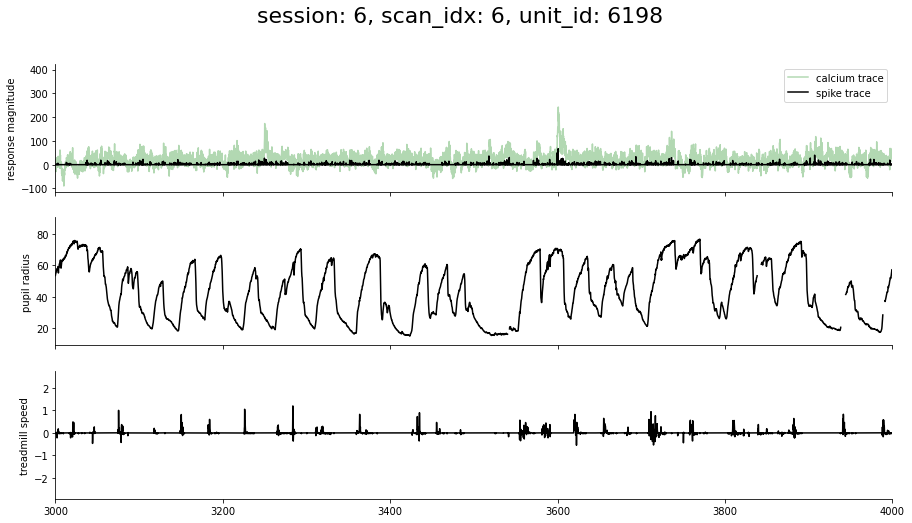

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
ax1.plot(time_axis, calcium_trace, color='g', alpha=0.3, label='calcium trace')
ax1.plot(time_axis, spike_trace, color='k', label='spike trace')
ax2.plot(time_axis, pupil_radius, color='k')
ax3.plot(time_axis, treadmill, color='k')
ax3.set_xlim(3000, 4000) 
ax1.set_ylabel('response magnitude')
ax1.legend()
ax2.set_ylabel('pupil radius')
ax3.set_ylabel('treadmill speed')
fig.suptitle(f'session: {unit_key["session"]}, scan_idx: {unit_key["scan_idx"]}, unit_id: {unit_key["unit_id"]}', fontsize=22);
[ax.spines['right'].set_visible(False) for ax in [ax1, ax2, ax3]];
[ax.spines['top'].set_visible(False) for ax in [ax1, ax2, ax3]];

### Plot oracle raster

Here we use a function provided in the `utils` module to retrieve the responses for the functional unit for the repeated stimulus trials (oracle trials). For a further description of the oracle see the technical documentation.

In [14]:
oracle_traces, score = utils.fetch_oracle_raster(unit_key)

In [15]:
fig,axes = plt.subplots(1,6, figsize=(6,1),dpi=300)
for col,clip_trace in zip(axes,np.moveaxis(oracle_traces,1,0)):
    col.imshow(clip_trace,cmap='binary', interpolation='nearest')
    col.set_aspect('auto')
    col.set_xticks([])
    col.set_yticks([])
axes[0].set_ylabel(f'oracle score: {score:.2f}', fontsize=5)
fig.subplots_adjust(wspace=.05)
[ax.set_title(f'oracle clip {i+1}', fontsize=6) for i, ax in enumerate(axes)];
fig.suptitle(f'session: {unit_key["session"]}, scan_idx: {unit_key["scan_idx"]}, unit_id: {unit_key["unit_id"]}', fontsize=7, y=1.2)

Text(0.5, 1.2, 'session: 6, scan_idx: 6, unit_id: 6198')